In [1]:
import sys
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from bs4.diagnose import diagnose
from bs4 import SoupStrainer
from urllib import request
import numpy as np
import scipy as sp
import requests
import time
import smtplib
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Open/extract table of TOIs
df = pd.read_csv('https://exofop.ipac.caltech.edu/tess/download_toi.php?sort=toi&output=csv')

#Remove some columns that do not seem relevant for manipulation to make table easier to read
columns_i_want = ['TIC ID', 'TOI',
       'TESS Mag', 'RA',
       'Dec', 'PM RA (mas/yr)', 'PM Dec (mas/yr)','Epoch (BJD)',
       'Period (days)', 'Duration (hours)', 'Depth (mmag)',
       'Depth (ppm)', 'Planet Radius (R_Earth)', 'Planet Insolation (Earth Flux)',
       'Planet Equil Temp (K)', 'Planet SNR', 'Stellar Distance (pc)', 'Stellar Eff Temp (K)',
        'Stellar log(g) (cm/s^2)', 'Stellar Radius (R_Sun)', 'Stellar Metallicity']
df_c = df.loc[:,columns_i_want]
df_c

,TIC ID,TOI,TESS Mag,RA,Dec,PM RA (mas/yr),PM Dec (mas/yr),Epoch (BJD),Period (days),Duration (hours),...,Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Planet SNR,Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun),Stellar Metallicity
0,231663901,101.01,12.40690,21:14:56.88,-55:52:18.71,12.641,-16.011,2.458326e+06,1.430401,1.638765,...,20452.531250,1.314501e+01,1193.379517,1499.044067,0.887868,375.3100,5600.000000,4.48851,0.860000,NaN
1,149603524,102.01,9.71090,05:48:33.56,-63:59:17.98,-15.641,26.046,2.458326e+06,4.411943,3.776425,...,13979.925781,1.539724e+01,586.130005,1370.000000,474.380951,175.6310,6280.000000,4.32092,1.280000,0.240000
2,336732616,103.01,11.52320,20:49:49.8,-24:25:43.3,10.426,15.620,2.458327e+06,3.547854,3.494333,...,10424.372070,1.458184e+01,1212.004395,1504.859009,0.800299,411.2110,6351.000000,4.22896,1.400000,NaN
3,231670397,104.01,9.86380,21:19:47.93,-58:08:56.16,10.552,-10.658,2.458328e+06,4.087445,5.590140,...,3586.197021,1.265210e+01,1672.217529,1630.958618,0.808662,316.6780,6036.000000,3.93359,2.070000,NaN
4,144065872,105.01,9.49950,22:29:49.88,-48:00:11.16,91.976,-6.861,2.458327e+06,2.184659,2.869426,...,11836.691406,1.251459e+01,985.883728,1429.144653,0.886027,137.5440,5630.000000,4.37759,1.130000,NaN
5,38846515,106.01,10.31570,04:35:50.36,-64:01:37.34,10.845,-0.499,2.458327e+06,2.849380,3.776111,...,7452.432617,9.061380e+00,1311.385376,1534.801880,278.009491,364.4110,6900.000000,4.43800,1.000000,NaN
6,92352620,107.01,9.64330,20:55:07.98,-34:08:08.7,26.376,-44.947,2.458328e+06,3.950054,4.557506,...,12999.897461,1.877557e+01,1098.209595,1468.219727,0.860200,211.2110,6153.000000,4.18077,1.620000,0.220000
7,289793076,108.01,13.16300,21:07:50.76,-26:05:48.19,3.479,-10.313,2.458328e+06,3.043839,2.660993,...,24143.222656,1.399950e+01,400.955292,1141.284058,0.820267,421.8550,5523.000000,4.52192,0.890000,NaN
8,29344935,109.01,13.23660,20:52:51.71,-25:41:14.55,1.053,-9.881,2.458326e+06,2.766737,2.568721,...,15691.951172,1.166177e+01,NaN,NaN,0.834164,513.0110,5346.000000,4.48823,0.930000,NaN
9,281459670,110.01,11.67140,00:22:28.45,-59:56:33.32,-22.309,-4.893,2.458328e+06,3.174305,2.723339,...,15603.693359,1.366880e+01,662.491028,1293.941772,100.352081,342.1400,5943.000000,4.42524,1.060000,-0.100000


In [4]:
#Coefficients for Seff equation
#Coefficients go in order of: recent venus, runaway greenhouse, maximum greenhouse, early mars, runaway greenhouse (5x earth mass), runaway greenhouse (.1x earth mass)
seffsun  = [1.776,1.107, 0.356, 0.320, 1.188, 0.99] 
a = [2.136e-4, 1.332e-4, 6.171e-5, 5.547e-5, 1.433e-4, 1.209e-4]
b = [2.533e-8, 1.580e-8, 1.698e-9, 1.526e-9, 1.707e-8, 1.404e-8]
c = [-1.332e-11, -8.308e-12, -3.198e-12, -2.874e-12, -8.968e-12, -7.418e-12]
d = [-3.097e-15, -1.931e-15, -5.575e-16, -5.011e-16, -2.084e-15, -1.713e-15]

1.776

In [5]:
#Remove objects with no Stellar temp or stellar radius (necessary in HZ calc)
df_c_refined = df_c[df_c['Stellar Eff Temp (K)'].notnull()]
df_c_refined2 = df_c_refined[df_c_refined['Stellar Radius (R_Sun)'].notnull()]
df_c_refined2

,TIC ID,TOI,TESS Mag,RA,Dec,PM RA (mas/yr),PM Dec (mas/yr),Epoch (BJD),Period (days),Duration (hours),...,Depth (ppm),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Planet SNR,Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun),Stellar Metallicity
0,231663901,101.01,12.40690,21:14:56.88,-55:52:18.71,12.641,-16.011,2.458326e+06,1.430401,1.638765,...,20452.531250,1.314501e+01,1193.379517,1499.044067,0.887868,375.3100,5600.000000,4.48851,0.860000,NaN
1,149603524,102.01,9.71090,05:48:33.56,-63:59:17.98,-15.641,26.046,2.458326e+06,4.411943,3.776425,...,13979.925781,1.539724e+01,586.130005,1370.000000,474.380951,175.6310,6280.000000,4.32092,1.280000,0.240000
2,336732616,103.01,11.52320,20:49:49.8,-24:25:43.3,10.426,15.620,2.458327e+06,3.547854,3.494333,...,10424.372070,1.458184e+01,1212.004395,1504.859009,0.800299,411.2110,6351.000000,4.22896,1.400000,NaN
3,231670397,104.01,9.86380,21:19:47.93,-58:08:56.16,10.552,-10.658,2.458328e+06,4.087445,5.590140,...,3586.197021,1.265210e+01,1672.217529,1630.958618,0.808662,316.6780,6036.000000,3.93359,2.070000,NaN
4,144065872,105.01,9.49950,22:29:49.88,-48:00:11.16,91.976,-6.861,2.458327e+06,2.184659,2.869426,...,11836.691406,1.251459e+01,985.883728,1429.144653,0.886027,137.5440,5630.000000,4.37759,1.130000,NaN
5,38846515,106.01,10.31570,04:35:50.36,-64:01:37.34,10.845,-0.499,2.458327e+06,2.849380,3.776111,...,7452.432617,9.061380e+00,1311.385376,1534.801880,278.009491,364.4110,6900.000000,4.43800,1.000000,NaN
6,92352620,107.01,9.64330,20:55:07.98,-34:08:08.7,26.376,-44.947,2.458328e+06,3.950054,4.557506,...,12999.897461,1.877557e+01,1098.209595,1468.219727,0.860200,211.2110,6153.000000,4.18077,1.620000,0.220000
7,289793076,108.01,13.16300,21:07:50.76,-26:05:48.19,3.479,-10.313,2.458328e+06,3.043839,2.660993,...,24143.222656,1.399950e+01,400.955292,1141.284058,0.820267,421.8550,5523.000000,4.52192,0.890000,NaN
8,29344935,109.01,13.23660,20:52:51.71,-25:41:14.55,1.053,-9.881,2.458326e+06,2.766737,2.568721,...,15691.951172,1.166177e+01,NaN,NaN,0.834164,513.0110,5346.000000,4.48823,0.930000,NaN
9,281459670,110.01,11.67140,00:22:28.45,-59:56:33.32,-22.309,-4.893,2.458328e+06,3.174305,2.723339,...,15603.693359,1.366880e+01,662.491028,1293.941772,100.352081,342.1400,5943.000000,4.42524,1.060000,-0.100000


In [8]:
#Add columns for value of star Temp (stellar eff temp - 5780) and Luminosity (stellar rad squared * rel stellar temp **4)
#Some relative luminosity is very small (practially 0) which screws up some calculations. Apply constraint?
df_c_refined2["T_star"] = pd.Series(df_c_refined2.loc[:,'Stellar Eff Temp (K)'].astype(int))-5780
df_c_refined2["Luminosity"] = pd.Series((df_c_refined2.loc[:,'Stellar Radius (R_Sun)'].astype(int))**2)*pd.Series(df_c_refined2.loc[:,'Stellar Eff Temp (K)'].astype(int)/5780)**4

#Add different Kopparapu Hzs using each set of coefficients (need to figure out which coefficients work for which objects)
df_c_refined2['hz_rv'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(int)))/(seffsun[0] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*a[0] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*b[0])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*c[0])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*d[0])**4))**.5
df_c_refined2['hz_rg_1x'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(int)))/(seffsun[1] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*a[1] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*b[1])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*c[1])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*d[1])**4))**.5
df_c_refined2['hz_mg'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(int)))/(seffsun[2] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*a[2] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*b[2])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*c[2])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*d[2])**4))**.5
df_c_refined2['hz_em'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(int)))/(seffsun[3] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*a[3] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*b[3])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*c[3])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*d[3])**4))**.5
df_c_refined2['hz_rg_5x'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(int)))/(seffsun[4] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*a[4] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*b[4])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*c[4])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*d[4])**4))**.5
df_c_refined2['hz_rg_.1x'] = ((pd.Series(df_c_refined2.loc[:,'Luminosity'].astype(int)))/(seffsun[5] + pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*a[5] + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*b[5])**2 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*c[5])**3 + (pd.Series(df_c_refined2.loc[:,'T_star'].astype(int))*d[5])**4))**.5




/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [12]:
#Table with all values
df_c_refined2

#create separate tables for each set of coefficients - easier for graphing later
#Only using a few values for now to graph in next section
df_rv = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_rv']]
df_rg_1x = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_rg_1x']]
df_mg = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_mg']]
df_em = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_em']]
df_rg_5x = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_rg_5x']]
df_rg_point1x = df_c_refined2.loc[:,['Planet Radius (R_Earth)','Stellar Eff Temp (K)', 'Stellar Radius (R_Sun)', 'hz_rg_.1x']]



,Planet Radius (R_Earth),Stellar Eff Temp (K),Stellar Radius (R_Sun),hz_rv
0,1.314501e+01,5600.000000,0.860000,0.000000
1,1.539724e+01,6280.000000,1.280000,0.728782
2,1.458184e+01,6351.000000,1.400000,0.725865
3,1.265210e+01,6036.000000,2.070000,1.478167
4,1.251459e+01,5630.000000,1.130000,0.000000
5,9.061380e+00,6900.000000,1.000000,0.996214
6,1.877557e+01,6153.000000,1.620000,0.734090
7,1.399950e+01,5523.000000,0.890000,0.000000
8,1.166177e+01,5346.000000,0.930000,0.000000
9,1.366880e+01,5943.000000,1.060000,0.743126


In [19]:
#Make Sets of each column to easily graph

#For each HZ set of coefficients, need to remove TOIs that have a 0 as HZ distance - comes from bad Luminosity calc
df_rv_nonzero = df_rv[df_rv['hz_rv']>.01]
df_rg_1x_nonzero = df_rg_1x[df_rg_1x['hz_rg_1x']>.01]
df_mg_nonzero = df_mg[df_mg['hz_mg']>.01]
df_em_nonzero = df_em[df_em['hz_em']>.01]
df_rg_5x_nonzero = df_rg_5x[df_rg_5x['hz_rg_5x']>.01]
df_rg_point1x_nonzero = df_rg_point1x[df_rg_point1x['hz_rg_.1x']>.01]


#Turn each set into a series to graph (only put recent venus here as example - can easily be extended to all)
stellar_rad_rv_index = df_rv_nonzero.set_index('Stellar Radius (R_Sun)')
stellar_rad_rv_list = stellar_rad_rv_index.index.tolist()

planet_rad_rv_index = df_rv_nonzero.set_index('Planet Radius (R_Earth)')
planet_rad_rv_list = planet_rad_rv_index.index.tolist()

stellar_temp_rv_index = df_rv_nonzero.set_index('Stellar Eff Temp (K)')
stellar_temp_rv_list = stellar_temp_rv_index.index.tolist()

hz_rv_index = df_rv_nonzero.set_index('hz_rv')
hz_rv_list = hz_rv_index.index.tolist()

[0.7287824490466663,
 0.7258649593264015,
 1.4781672891525803,
 0.9962136139625344,
 0.7340899847286564,
 0.7431264895438373,
 0.738480740249737,
 0.7494744279685026,
 1.305669071489191,
 1.3238719793081377,
 0.7383517383164404,
 0.7326157135638225,
 0.7369371644363113,
 0.7281631472008235,
 0.9968477675497395,
 0.7332043554373089,
 0.7496993371429629,
 0.725049436056984,
 0.7428198778791667,
 1.3123766423869623,
 0.7488457575293671,
 0.7414230418357601,
 0.7260283944512573,
 1.489154151822955,
 0.7312755525610966,
 0.7484424466644551,
 1.482324022567345,
 0.992068764326653,
 0.7434773682162424,
 0.7131373234441378,
 0.7438727014351026,
 0.7389974249723472,
 0.7487112481394499,
 0.7418151053013002,
 0.7494294704188758,
 0.7235074850455118,
 1.4742163900493648,
 1.6305322629280623,
 0.7246833462811654,
 0.7238717947793437,
 0.7110548524669354,
 0.7263146717564224,
 0.7383087526928598,
 0.7389974249723472,
 0.7432580108211243,
 3.600269090981739,
 1.7504466395239002,
 0.7214133007311977,

Text(0, 0.5, 'HZ in AU')

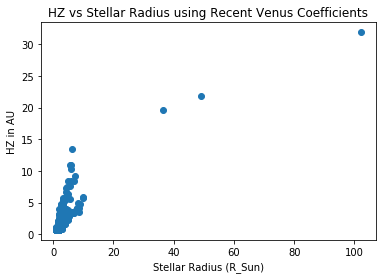

In [20]:
#Graph hz vs stellar radius for recent venus
plt.scatter(stellar_rad_rv_list,hz_rv_list)
plt.title('HZ vs Stellar Radius using Recent Venus Coefficients')
plt.xlabel('Stellar Radius (R_Sun)')
plt.ylabel('HZ in AU')

Text(0, 0.5, 'HZ in AU')

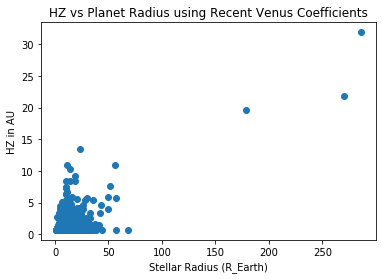

In [21]:
#Graph hz vs planet radius for recent venus
plt.scatter(planet_rad_rv_list,hz_rv_list)
plt.title('HZ vs Planet Radius using Recent Venus Coefficients')
plt.xlabel('Stellar Radius (R_Earth)')
plt.ylabel('HZ in AU')

Text(0, 0.5, 'HZ in AU')

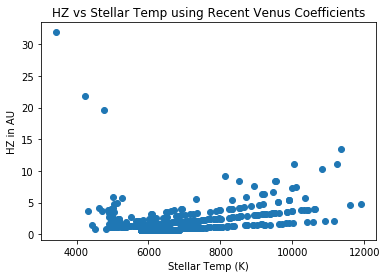

In [22]:
#Graph hz vs stellar temp for recent venus
plt.scatter(stellar_temp_rv_list,hz_rv_list)
plt.title('HZ vs Stellar Temp using Recent Venus Coefficients')
plt.xlabel('Stellar Temp (K)')
plt.ylabel('HZ in AU')